In [1]:
import numpy as np
import pandas as pd
from deepneuralnet import *
import deepneuralnet_train as dnntrain

In [2]:
# Set up hyper parameters 
classes = 2
layer_dims = [10, classes] 
learning_rate = 0.001
keep_prob = 0.8
minibatch_size = 64
momentum = 0.97
maxnorm_clip = 3
print_summary = False
isBinary = classes == 2 
hyperparams = DNN.create_hyperparameter_bundle(layer_dims=layer_dims, 
                                               learning_rate=learning_rate, 
                                               dropout_keep_prob = keep_prob, 
                                               dropout_maxnorm_clip = maxnorm_clip, 
                                               beta1 = momentum, 
                                               minibatch_size = minibatch_size)
print(hyperparams)

{'KEY_LAYER_DIMS': [10, 2], 'KEY_LEARNING_RATE': 0.001, 'KEY_DROPOUT_KEEP_PROB': 0.8, 'KEY_MAX_NORM_CLIP': 3.0, 'KEY_ADAM_BETA1': 0.97, 'KEY_MINI_BATCH_SIZE': 64}


In [3]:
# Generate data
m = 1000
n_x = 100
label = 'Survived'
x_data = np.random.rand(m, n_x).astype('float32')
y_test = None

if isBinary:
    y_test = np.random.randint(2, size=(1, m)).astype('float32')[0]
else:
    y_test = np.random.randint(classes, size=(1, m)).astype('float32')[0]

df = pd.DataFrame(x_data)
df[label] = y_test
classification = len(set(y_test))
print(classification)

2


Setting hyperparameters...
train_x.shape: (700, 100)
train_y.shape: (700, 2)
dev_x.shape: (300, 100)
dev_y.shape: (300, 2)
Configuring graph...
Model ID: 1
Binary classification neural network with hyperparameters:
layer_dims: [10, 2] learning_rate: 0.0010000000474974513, dropoutKeepProb: 0.800000011920929  num_epochs: 250
minibatch_size: 64 momentum: 0.9700000286102295 maxnormclip: 3.0
Saving metagraph to ./saved_model_1/dnn
Training underway...
Cost after epoch 0: 0.834513
Cost after epoch 20: 0.749039
Cost after epoch 40: 0.716236
Cost after epoch 60: 0.683700
Cost after epoch 80: 0.655765
Cost after epoch 100: 0.624076
Cost after epoch 120: 0.594551
Cost after epoch 140: 0.590823
Cost after epoch 160: 0.572648
Cost after epoch 180: 0.558124
Cost after epoch 200: 0.548847
epoch to save 200
Saving checkpoint at epoch: 200
Cost after epoch 220: 0.535273
Cost after epoch 240: 0.533255
epoch to save 250
Saving checkpoint at epoch: 250
Done Training!


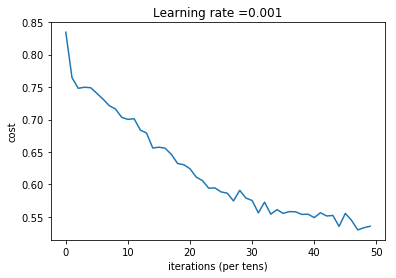

train_accuracy_percent : 84.2857122421
test_accuracy_percent : 54.3333351612
precision_percent : 54.3333333333
recall_percent : 54.3333333333
f1score : 54.3333333333



In [4]:
# Typical DNN use case
nn = DNN()
nn.set_hyperparameters(hyperparams)
(train_x, train_y, dev_x, dev_y) = DNN.split_data(df, label, 0.7)
nn.configure_graph(train_x, train_y)
results = nn.train(train_x, train_y, dev_x, dev_y, 
                   num_epochs = 250, print_summary = True, 
                   checkpoint_interval = 200)

In [5]:
# Make predictions
predictions = nn.predict(x_data)
print(predictions.shape)

(1000,)


INFO:tensorflow:Restoring parameters from ./saved_model_1/dnn-200
Model ID: 1
Binary classification neural network with hyperparameters:
layer_dims: [Dimension(10), Dimension(2)] learning_rate: 0.0010000000474974513, dropoutKeepProb: 0.800000011920929  num_epochs: 250
minibatch_size: 64 momentum: 0.9700000286102295 maxnormclip: 3.0
Saving metagraph to ./saved_model_1/dnn
Resuming training from previous epoch of 200
Training underway...
Cost after epoch 0: 0.810450
Cost after epoch 20: 0.743536
Cost after epoch 40: 0.706209
Cost after epoch 60: 0.681064
Cost after epoch 80: 0.649827
Cost after epoch 100: 0.614875
Cost after epoch 120: 0.593202
Cost after epoch 140: 0.570282
Cost after epoch 160: 0.561595
Cost after epoch 180: 0.551174
Cost after epoch 200: 0.541241
epoch to save 400
Saving checkpoint at epoch: 400
Cost after epoch 220: 0.548175
Cost after epoch 240: 0.538962
epoch to save 450
Saving checkpoint at epoch: 450
Done Training!


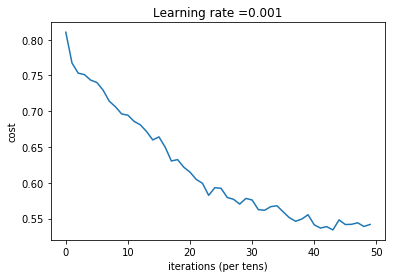

train_accuracy_percent : 85.7142865658
test_accuracy_percent : 51.6666650772
precision_percent : 51.6666666667
recall_percent : 51.6666666667
f1score : 51.6666666667

[ 1.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  1.
  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  1.  0.
  0.  1.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.
  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  1.  1.  0.
  0.  1.  0.  1.  1.  1.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  1.  1.
  1.  1.  1.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.  1.
  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.  1.  1.  0.  0.  1.  0.
  1.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.
  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  0.  0.  0.  1.
  0.  1.  0.  0.  1.  0.  1.  

In [6]:
# Restoring saved model from cell above
dnn2 = DNN()
dnn2.restore_saved_model(1, 200)
results2 = dnn2.train(train_x, train_y, dev_x, dev_y, 
                      num_epochs = 250, print_summary = True, 
                      checkpoint_interval = 200)
predictions2 = dnn2.predict(x_data)
print(predictions2)

Setting hyperparameters...
Splitting data...
train_x.shape: (700, 100)
train_y.shape: (700, 2)
dev_x.shape: (300, 100)
dev_y.shape: (300, 2)
Configuring graph...
Model ID: 2
Binary classification neural network with hyperparameters:
layer_dims: [10, 2] learning_rate: 0.0010000000474974513, dropoutKeepProb: 0.800000011920929  num_epochs: 100
minibatch_size: 64 momentum: 0.9700000286102295 maxnormclip: 3.0
Saving metagraph to ./saved_model_2/dnn
Training underway...
Cost after epoch 0: 0.778388
Cost after epoch 20: 0.744638
Cost after epoch 40: 0.706091
epoch to save 50
Saving checkpoint at epoch: 50
Cost after epoch 60: 0.636092
Cost after epoch 80: 0.602703
epoch to save 100
Saving checkpoint at epoch: 100
Done Training!


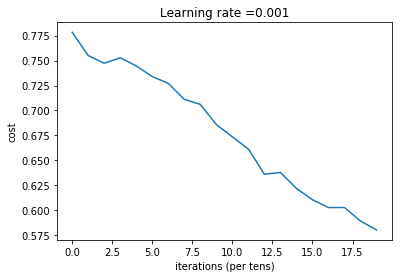

train_accuracy_percent : 80.1428556442
test_accuracy_percent : 51.3333320618
precision_percent : 51.3333333333
recall_percent : 51.3333333333
f1score : 51.3333333333

[ 0.  1.  0.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.
  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.
  0.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.
  0.  1.  0.  1.  1.  1.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.
  0.  0.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.
  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  1.
  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.
  1.  1.  1.  0.  0.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.  1.
  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.
  0.  1.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  1.  1.  0.  1.  1.  1.
  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  1.
  0.  1.  0.  0.  1.  0.  0.  

In [8]:
# Using convenience methods
nn3 = DNN(identifier=2)
nn3.set_hyperparams_split_data_configure_train(hyperparams, 
                                               df, 
                                               label, num_epochs = 100, 
                                               split_percent = 0.7, 
                                               print_summary = True, 
                                               checkpoint_interval = 50)
predictions3 = nn3.predict(x_data)
print(predictions3)